# SCRAPING

In [ ]:
#SCRIPT PER LO SCRAPING DI TUTTI I DATI RELATIVI A SHOES DI lumberjack (SIA UOMO CHE DONNA)

import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://www.lumberjack.com/it/shoes?page={}"

#Nel caso in cui si volesse fare un filtro da sito, la pagina da considerare è la seguente:
# base_url = "https://www.lumberjack.com/it/campaign/woman?category=shoes&page={}"

def get_shoe_links():
    shoe_links = []

    for page in range(1, 31):
        page_url = base_url.format(page)
        response = requests.get(page_url)
        soup = BeautifulSoup(response.content, "html.parser")

        # Trova tutti i link alle pagine delle scarpe nella pagina corrente
        for shoe_div in soup.find_all("div", class_="js-product-vertical col-6 col-lg-4 listing__col-product"):
            link = shoe_div.find("a", href=True)
            if link:
                shoe_links.append(link["href"])

    return shoe_links

def get_product_details(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    product_details = {}

    # Trova tutti i valori delle classi col-6
    for div in soup.find_all("div", class_="col-6"):
        text = div.get_text(strip=True)
        if "Marchio" in text:
            product_details["Marchio"] = text.replace("Marchio: ", "")
        elif "Modello" in text:
            product_details["Modello"] = text.replace("Modello: ", "")
        elif "Colore" in text:
            product_details["Colore"] = text.replace("Colore: ", "")
        elif "Materiale" in text:
            product_details["Materiale"] = text.replace("Materiale: ", "")
        elif "Altri Prodotti" in text:
            product_details["Altri Prodotti"] = text.replace("Altri Prodotti: ", "")
        elif "Genere" in text:
            product_details["Genere"] = text.replace("Genere: ", "")

    # Trova il prezzo del prodotto
    price_div = soup.find("span", class_="product__prices-sale")
    if price_div:
        product_details["Prezzo"] = price_div.get_text(strip=True)

    return product_details

# Ottieni i link delle scarpe
shoe_links = get_shoe_links()
all_product_details = []

# Stampa i link trovati e raccogli i dettagli del prodotto
for link in shoe_links:
    full_url = "https://www.lumberjack.com" + link
    product_details = get_product_details(full_url)
    all_product_details.append(product_details)

# Calcola e stampa il numero di link
print(f"Numero totale di link trovati: {len(shoe_links)}")

# Crea un DataFrame dai dettagli raccolti
df = pd.DataFrame(all_product_details)
print(df)

# Crea una copia del DataFrame (da eventualmente utilizzare in script successivi)
df_copy_lumberjack = df.copy()

# Salva il DataFrame in un file CSV (per avere una copia pronta per attività successive)
df_copy_lumberjack.to_csv("shoe_data_lumberjack.csv", index=False)

print("DataFrame Lumberjack salvato in 'shoe_data_lumberjack.csv'")

Numero totale di link trovati: 720
               Marchio          Modello         Genere              Colore  \
0    MarchioLumberjack     ModelloLILLI  GenereBambina         ColoreWhite   
1    MarchioLumberjack    ModelloATHENS    GenereDonna         ColoreBlack   
2    MarchioLumberjack      ModelloSERY    GenereDonna         ColoreWhite   
3    MarchioLumberjack      ModelloSERY    GenereDonna          ColoreGrey   
4    MarchioLumberjack      ModelloSERY    GenereDonna         ColoreBlack   
..                 ...              ...            ...                 ...   
715  MarchioLumberjack    ModelloMARVIN     GenereUomo     ColoreNavy blue   
716  MarchioLumberjack     ModelloDORIS    GenereDonna  ColoreWhite/silver   
717  MarchioLumberjack     ModelloDORIS    GenereDonna    ColoreWhite/pink   
718  MarchioLumberjack    ModelloBEAVER  GenereBambina     ColoreNavy blue   
719  MarchioLumberjack  ModelloCATERINA    GenereDonna         ColoreWhite   

                            

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL della sitemap
sitemap_url = "https://www.kammi.it/sitemap.xml"

# Scarica il contenuto della sitemap
response = requests.get(sitemap_url)
soup = BeautifulSoup(response.content, 'xml')

# Estrai tutti gli URL che terminano con ".html"
urls = [loc.text for loc in soup.find_all('loc') if loc.text.endswith('.html')]

def extract_values(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Trova tutti i pulsanti con la classe specifica che contiene i valori "value"
    buttons = soup.find_all('button', class_='content d-flex align-items-center justify-content-center p-2 checkRitiroPP')

    # Estrai i valori degli attributi "value" da tutti i pulsanti e uniscili in una stringa separata da "-"
    valori = "-".join([button.get_text(strip=True) for button in buttons])

    return valori


# Funzione per estrarre i dati da una pagina
def extract_data(url):
    page = requests.get(url)
    page_soup = BeautifulSoup(page.content, 'html.parser')

    # Estrai i breadcrumb items
    breadcrumb_items = page_soup.select('.breadcrumb-item')
    percorso = " - ".join([item.get_text(strip=True) for item in breadcrumb_items])

    # Estrai il nome del prodotto
    nome = page_soup.select_one('h1.text-black.h4.fw-bold')
    nome = nome.get_text(strip=True) if nome else "Non disponibile"

    # Estrai il prezzo
    prezzo = page_soup.select_one('.price.mt-2')
    prezzo = prezzo.get_text(strip=True) if prezzo else "Non disponibile"

    # Estrai la descrizione
    descrizione = page_soup.select_one('.mt-4')
    descrizione = descrizione.get_text(strip=True) if descrizione else "Non disponibile"

    valori = extract_values(url)

    return {"URL": url, "Percorso": percorso, "Nome": nome, "Taglie": valori, "Prezzo": prezzo, "Descrizione": descrizione}

# Crea una lista per salvare i dati
data = []

# Processa gli URL e salva i dati
for url in urls:
    data.append(extract_data(url))

# Crea un DataFrame dai dettagli raccolti
df_kammi = pd.DataFrame(data)

# Crea una copia del DataFrame (da eventualmente utilizzare in script successivi)
df_copy_kammi = df.copy()

# Salva il DataFrame in un file CSV (per avere una copia pronta per attività successive)
df_copy_kammi.to_csv("kammi_data.csv", index=False)

print("Dataframe Kammi estratto e salvato in 'kammi_data.csv'.")

In [ ]:
#In basso tutte le operazioni fatte per pulire i dati di lumberjack:

import pandas as pd

df_copy=pd.read_csv(/content/shoe_data_lumberjack.csv)

print("Dati Prima:","\n",df_copy.head(5))

df_copy["Marchio"] = df_copy["Marchio"].str.replace("Marchio", "")
df_copy["Modello"] = df_copy["Modello"].str.replace("Modello", "")
df_copy["Colore"] = df_copy["Colore"].str.replace("Colore", "")
df_copy["Materiale"] = df_copy["Materiale"].str.replace("Materiale", "")
df_copy["Altri Prodotti"] = df_copy["Altri Prodotti"].str.replace("Altri Prodotti", "")
df_copy["Genere"] = df_copy["Genere"].str.replace("Genere", "")
df_copy = df_copy.rename(columns={'Altri Prodotti': 'Categoria'})
df_copy = df_copy.apply(lambda x: x.str.upper())
df_copy.loc[df_copy["Categoria"]=="SCARPE"]
df_copy["Categoria"] = df_copy["Categoria"].replace("SCARPE", "SNEAKERS"  )
df_copy.groupby("Categoria").count()
df_copy["Prezzo"] = df_copy["Prezzo"].str.replace(r'\s*EUR$', '', regex=True)
df_copy["Prezzo"] = df_copy["Prezzo"].str.replace(',', '.')
df_copy["Prezzo"]= pd.to_numeric(df_copy["Prezzo"])

print("Dati Dopo:","\n",df_copy.head(5))

In [ ]:
print(df_copy.head(5))

NameError: name 'df_copy' is not defined

In [ ]:
print(df_copy.head(5))
df_copy.groupby('Categoria').count()

      Marchio    Modello    Colore Materiale        Categoria  Prezzo
0  LUMBERJACK  NAVIGATOR      BLUE     SUEDE  SCARPE DA BARCA   84.99
1  LUMBERJACK  NAVIGATOR  LT GREEN     SUEDE  SCARPE DA BARCA   84.99
2  LUMBERJACK  NAVIGATOR      ROSE     SUEDE  SCARPE DA BARCA   84.99
3  LUMBERJACK    RAVENNE     WHITE    CANVAS         SNEAKERS   39.99
4  LUMBERJACK    RAVENNE     BLACK    CANVAS         SNEAKERS   39.99


,Marchio,Modello,Colore,Materiale,Prezzo
Categoria,,,,,
SANDALI,72,72,72,72,72
SCARPE DA BARCA,11,11,11,11,11
SNEAKERS,145,145,145,145,145
SPORT,4,4,4,4,4


In [ ]:
#SCRIPT PER LO SCRAPING DI TUTTI I DATI RELATIVI A SHOES DI kammi (SOLO DONNA - ESTIVE)
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL della pagina
url = "https://www.kammi.it/scarpe-donna/"

#Nel caso in cui si volessero considerare quelle invernali separatamente:
# url = "https://www.kammi.it/scarpe-donna-autunno-inverno/"

# Lista per memorizzare i dati
data = {'Nome': [], 'Descrizione': [], 'Prezzo': []}

# Effettua la richiesta GET alla pagina
response = requests.get(url)

# Verifica se la richiesta è andata a buon fine
if response.status_code == 200:
    # Parsing del contenuto HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Trova tutti i link con la classe specificata
    links = soup.find_all('a', class_='nav-link active border-0')

    # Per ogni link trovato
    for link in links:
        # Ottieni l'URL del link
        link_url = link['href']

        # Effettua la richiesta GET alla pagina del link trovato
        response_link = requests.get(link_url)

        # Verifica se la richiesta è andata a buon fine
        if response_link.status_code == 200:
            # Parsing del contenuto HTML della pagina del link trovato
            soup_link = BeautifulSoup(response_link.text, 'html.parser')

            # Trova tutti i valori di product-body p-3 nella pagina del link trovato
            product_bodies = soup_link.find_all('div', class_='product-body p-3')

            # Estrai i dati e aggiungili alla lista
            for body in product_bodies:
                nome = body.find('p', class_='product-title').text.strip() if body.find('p', class_='product-title') else 'N/D'
                descrizione = body.find('p', class_='product-description').text.strip() if body.find('p', class_='product-description') else 'N/D'

                # Trova tutti gli elementi product-price
                product_prices = body.find_all('p', class_='product-price')

                # Se ci sono almeno due elementi product-price, prendi il testo del secondo elemento
                prezzo = product_prices[1].text.strip() if len(product_prices) > 1 else 'N/D'

                data['Nome'].append(nome)
                data['Descrizione'].append(descrizione)
                data['Prezzo'].append(prezzo)
        else:
            print("Errore durante la richiesta alla pagina:", response_link.status_code)
else:
    print("Errore durante la richiesta alla pagina:", response.status_code)

# Crea il DataFrame
df = pd.DataFrame(data)

# Stampare il DataFrame
print(df)
# Crea una copia del DataFrame
df_copy2 = df.copy()

#Nel caso in cui volessimo entrambi i dataframe invernale ed estivo, potremmo far elaborare lo script di entrambi separatamente e poi unirli come sotto:
# df_kimmi = pd.concat([df_copy2, df_copy3], ignore_index=True)
# df_kimmi

# # Salva il DataFrame in un file CSV
# df_kimmi.to_csv("shoe_data2.csv", index=False)


              Nome                                        Descrizione  \
0   Sneakers 82066  Sneakers in pelle bianca con inserti verde men...   
1   Sneakers 82066  Sneakers in pelle bianca con inserti laminato ...   
2   Sneaker Marina  Sneakers in pelle bianca con tallonetta in gli...   
3   Sneaker Marina  Sneakers in pelle bianca con tallonetta in gli...   
4     Sneaker Nina  Sneakers in pelle bianca, saetta in pelle e gl...   
..             ...                                                ...   
87  Ballerina 5025  Ballerina sfilata colore sabbia, arricchita da...   
88  Mocassino  L48  Mocassino in tessuto con stampa geometrica e i...   
89   Mocassino L60  Mocassino in tessuto ricoperto interamente da ...   
90  Ballerina Lulu  Ballerina in pelle color platino con lavorazio...   
91  Ballerina Lulu  Ballerina in pelle nera con lavorazione a sacc...   

      Prezzo  
0   105,00 €  
1   105,00 €  
2   109,00 €  
3   109,00 €  
4   109,00 €  
..       ...  
87  109,00 €  
88 

In [ ]:
#SCRIPT PER LA PULIZIA DEI DATI DI KAMMI
df_copy2
df_copy2['Categoria'] = df_copy2['Nome'].str.split().str[0]
df_copy2
df_copy2.groupby('Categoria').count()
df_copy2["Prezzo"] = df_copy2["Prezzo"].str.replace('€', '', regex=True)
df_copy2["Prezzo"] = df_copy2["Prezzo"].str.replace(',', '.')
df_copy2["Prezzo"]= pd.to_numeric(df_copy2["Prezzo"])
df_copy2

,Nome,Descrizione,Prezzo,Categoria
0,Sneakers 82066,Sneakers in pelle bianca con inserti verde men...,105.0,Sneakers
1,Sneakers 82066,Sneakers in pelle bianca con inserti laminato ...,105.0,Sneakers
2,Sneaker Marina,Sneakers in pelle bianca con tallonetta in gli...,109.0,Sneaker
3,Sneaker Marina,Sneakers in pelle bianca con tallonetta in gli...,109.0,Sneaker
4,Sneaker Nina,"Sneakers in pelle bianca, saetta in pelle e gl...",109.0,Sneaker
...,...,...,...,...
87,Ballerina 5025,"Ballerina sfilata colore sabbia, arricchita da...",109.0,Ballerina
88,Mocassino L48,Mocassino in tessuto con stampa geometrica e i...,129.0,Mocassino
89,Mocassino L60,Mocassino in tessuto ricoperto interamente da ...,115.0,Mocassino
90,Ballerina Lulu,Ballerina in pelle color platino con lavorazio...,89.9,Ballerina


In [ ]:
#SCRIPT PER UNA PRIMA VERIFICA:
df_copy2['Sottotipologie'] = df_copy2['Nome'].apply(lambda x: ' '.join(x.split()[:-1]))
df_copy2['Sottotipologie'].unique()

array(['Sneakers', 'Sneaker', 'Sneakers 2651', 'Slip on Catena',
       'Sandalo', 'Ciabatta', 'Ciabatta new', 'Tronchetto', 'Zeppa',
       'Sandalo con tacco', 'Sandalo con il tacco',
       'Sandalo con tacco 8006', 'Slingback M051', 'Slingback',
       'Scarpa con tacco', 'Mocassino con tacco', 'Slingback bassa',
       'Mocassino 2002', 'Mocassino', 'Ballerina'], dtype=object)

In [ ]:
#SCRIPT PER ULTERIORE PULIZIA DEI DATI:
df_copy2['Sottotipologie'] = df_copy2['Sottotipologie'].str.replace('Sneaker', 'Sneakers')
df_copy2['Sottotipologie'] = df_copy2['Sottotipologie'].str.replace('Ciabatta new', 'Ciabatta')
df_copy2['Sottotipologie'] = df_copy2['Sottotipologie'].str.replace('Sandalo con tacco', 'Sandalo con il tacco')
df_copy2['Sottotipologie'] = df_copy2['Sottotipologie'].str.replace('Sandalo con tacco 8006', 'Sandalo con il tacco')
df_copy2['Sottotipologie'] = df_copy2['Sottotipologie'].str.replace('Mocassino 2002', 'Mocassino')
df_copy2['Sottotipologie'] = df_copy2['Sottotipologie'].str.replace('Slingback M051', 'Slingback')

In [ ]:
df_copy2['Sottotipologie'].unique()

array(['Sneakerss', 'Sneakers', 'Sneakerss 2651', 'Slip on Catena',
       'Sandalo', 'Ciabatta', 'Tronchetto', 'Zeppa',
       'Sandalo con il tacco', 'Sandalo con il tacco 8006', 'Slingback',
       'Scarpa con tacco', 'Mocassino con tacco', 'Slingback bassa',
       'Mocassino', 'Ballerina'], dtype=object)

In [ ]:
df_copy2['Sottotipologie'] = df_copy2['Sottotipologie'].str.replace('Sandalo con il tacco 8006', 'Sandalo con il tacco')

In [ ]:
df_copy2['Sottotipologie'] = df_copy2['Sottotipologie'].str.replace('Sneakerss', 'Sneakers')

In [ ]:
df_copy2.groupby("Categoria")['Sottotipologie'].unique()

Categoria
BALLERINA                          [BALLERINA]
CIABATTA                            [CIABATTA]
MOCASSINO     [MOCASSINO CON TACCO, MOCASSINO]
SANDALO        [SANDALO, SANDALO CON IL TACCO]
SCARPA                      [SCARPA CON TACCO]
SLINGBACK         [SLINGBACK, SLINGBACK BASSA]
SLIP                          [SLIP ON CATENA]
SNEAKER                             [SNEAKERS]
SNEAKERS             [SNEAKERS, SNEAKERS 2651]
TRONCHETTO                        [TRONCHETTO]
ZEPPA                                  [ZEPPA]
Name: Sottotipologie, dtype: object

In [ ]:
#SCRIPT PER ULTERIORE PULIZIA DEI DATI:
df_copy2["Nome"] = df_copy2["Nome"].str.upper()
df_copy2["Categoria"]=df_copy2["Categoria"].str.upper()
df_copy2['Sottotipologie']=df_copy2['Sottotipologie'].str.upper()
df_copy2['Sottotipologie'].unique()
df_copy2['Descrizione']=df_copy2['Descrizione'].str.upper()
df_copy2['Categoria'] = df_copy2['Categoria'].str.replace('SNEAKERSS', 'SNEAKERS')
df_copy['Categoria'] = df_copy['Categoria'].str.replace('SANDALI', 'SANDALO')

In [ ]:
#SCRIPT PER PRIMO CONFRONTO VALORI PER CATEGORIA DEI 2 DATAFRAME:
print("I valori di kammi_estive:","\n",df_copy2.groupby('Categoria')["Prezzo"].max(),"\n")

print("I valori di lumberjack:","\n",df_copy.groupby('Categoria')["Prezzo"].max(),"\n")

I valori di kammi_estive: 
 Categoria
BALLERINA     109.0
CIABATTA       79.9
MOCASSINO     129.0
SANDALO       115.0
SCARPA         85.0
SLINGBACK     135.0
SLIP           99.9
SNEAKER       109.0
SNEAKERS      109.0
TRONCHETTO    139.0
ZEPPA          99.9
Name: Prezzo, dtype: float64 

I valori di lumberjack: 
 Categoria
BEATLES            59.99
MOCASSINI          89.99
SANDALO            79.99
SCARPE CASUAL      84.99
SCARPE DA BARCA    89.99
SNEAKERS           89.99
SPORT              49.99
STIVALI            79.99
STIVALI TECNICI    49.99
Name: Prezzo, dtype: float64 



In [ ]:
df_copy2

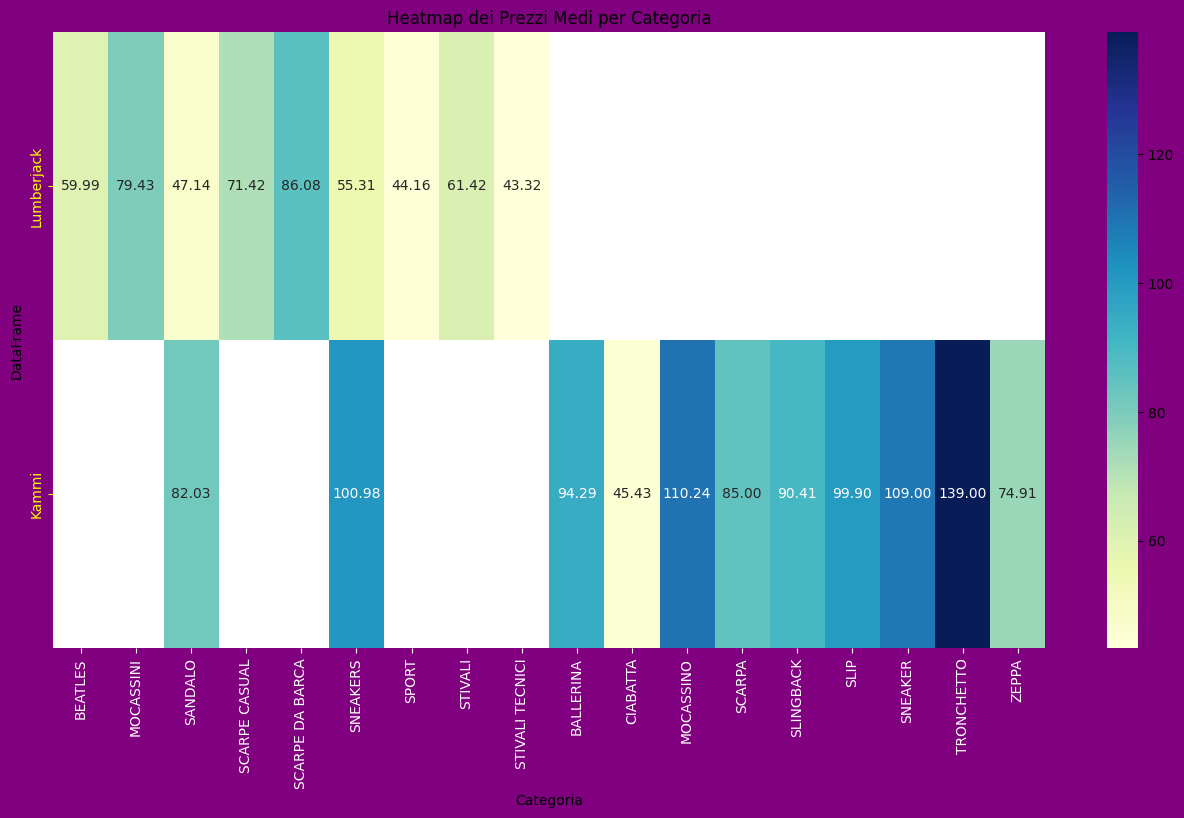

In [ ]:
#SCRIPT PER UNA PRIMA RAPPRESENTAZIONE DEI DATI E PER LA PRESENTAZIONE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Calcolo del prezzo medio per ogni categoria in ciascun DataFrame
mean_prices_df_copy = df_copy.groupby('Categoria')['Prezzo'].mean().reset_index()
mean_prices_df_copy2 = df_copy2.groupby('Categoria')['Prezzo'].mean().reset_index()

# Rinominare la colonna Prezzo per distinguere i due DataFrame
mean_prices_df_copy.columns = ['Categoria', 'Lumberjack']
mean_prices_df_copy2.columns = ['Categoria', 'Kammi']

# Unire i due DataFrame sulle categorie
merged_df = pd.merge(mean_prices_df_copy, mean_prices_df_copy2, on='Categoria', how='outer')

# Creazione della matrice per la Heatmap
heatmap_data = merged_df.set_index('Categoria').transpose()

# Scarica l'immagine di sfondo
url = "https://i.pinimg.com/originals/3e/74/2d/3e742d40240a5389d47e3b92daf97f55.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Creazione della Heatmap
plt.figure(figsize=(16, 8),facecolor="purple")

# Ottieni i limiti dei dati del boxplot
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

# # Sovrapponi l'immagine
# plt.figimage(img, xo=0, yo=0, alpha=0.2)


sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True, fmt='.2f')
plt.gca().tick_params(axis='x', colors='white')  # colore degli assi x
plt.gca().tick_params(axis='y', colors='yellow')  # colore degli assi y
plt.title('Heatmap dei Prezzi Medi per Categoria')
plt.xlabel('Categoria')
plt.ylabel('DataFrame')
plt.show()